In [1]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 12.1 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


In [3]:
df = pd.read_csv("heart.csv")

In [4]:
null_values = df.isnull().sum()
print(null_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [56]:
from sklearn.metrics import accuracy_score


In [57]:
import time

start_time = time.time()

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

selected_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
df = df[selected_columns]

df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X = df_encoded.drop("HeartDisease", axis=1)
Y = df_encoded["HeartDisease"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_lr)
print(f"Accuracy Score: {accuracy}")
end_time = time.time()
elapsed_time_knn = end_time - start_time
print(f"Model took {elapsed_time_knn} seconds to run.")


Accuracy Score: 0.8532608695652174
Model took 1.6171207427978516 seconds to run.


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

selected_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
df = df[selected_columns]

df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X = df_encoded.drop("HeartDisease", axis=1)
Y = df_encoded["HeartDisease"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

Y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"Accuracy Score (SVM): {accuracy}")
end_time = time.time()
elapsed_time_gb = end_time - start_time
print(f"Model took {elapsed_time_gb} seconds to run.")

Accuracy Score (SVM): 0.8532608695652174
Model took 14.018298625946045 seconds to run.


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

selected_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
df = df[selected_columns]

df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X = df_encoded.drop("HeartDisease", axis=1)
Y = df_encoded["HeartDisease"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

Y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy Score (Random Forest): {accuracy}")
end_time = time.time()
elapsed_time_gb = end_time - start_time
print(f"Model took {elapsed_time_gb} seconds to run.")

Accuracy Score (Random Forest): 0.8858695652173914
Model took 20.010645389556885 seconds to run.


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

selected_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
df = df[selected_columns]

df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X = df_encoded.drop("HeartDisease", axis=1)
Y = df_encoded["HeartDisease"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

Y_pred_xgb = xgb_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_xgb)
print(f"Accuracy Score (XGBoost): {accuracy}")
end_time = time.time()
elapsed_time_gb = end_time - start_time
print(f"Model took {elapsed_time_gb} seconds to run.")

Accuracy Score (XGBoost): 0.875
Model took 24.91770648956299 seconds to run.


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

selected_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
df = df[selected_columns]

df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X = df_encoded.drop("HeartDisease", axis=1)
Y = df_encoded["HeartDisease"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred_gnb = gnb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_gnb)
print(f"Accuracy Score (Naive Bayes): {accuracy}")
end_time = time.time()
elapsed_time_gb = end_time - start_time
print(f"Model took {elapsed_time_gb} seconds to run.")

Accuracy Score (Naive Bayes): 0.8641304347826086
Model took 30.4427752494812 seconds to run.


In [18]:
print("Accuracy Scores for Different Models on the Heart Dataset:")
print()

score_lr = 0.8532608695652174
score_svm = 0.8532608695652174
score_rf = 0.8804347826086957
score_xgb = 0.875
score_nb = 0.8641304347826086

print(f"Logistic Regression Accuracy Score: {score_lr * 100:.2f}%")
print(f"Support Vector Machine Accuracy Score: {score_svm * 100:.2f}%")
print(f"Random Forest Accuracy Score: {score_rf * 100:.2f}%")
print(f"XGBoost Accuracy Score: {score_xgb * 100:.2f}%")
print(f"Naive Bayes Accuracy Score: {score_nb * 100:.2f}%")

Accuracy Scores for Different Models on the Heart Dataset:

Logistic Regression Accuracy Score: 85.33%
Support Vector Machine Accuracy Score: 85.33%
Random Forest Accuracy Score: 88.04%
XGBoost Accuracy Score: 87.50%
Naive Bayes Accuracy Score: 86.41%


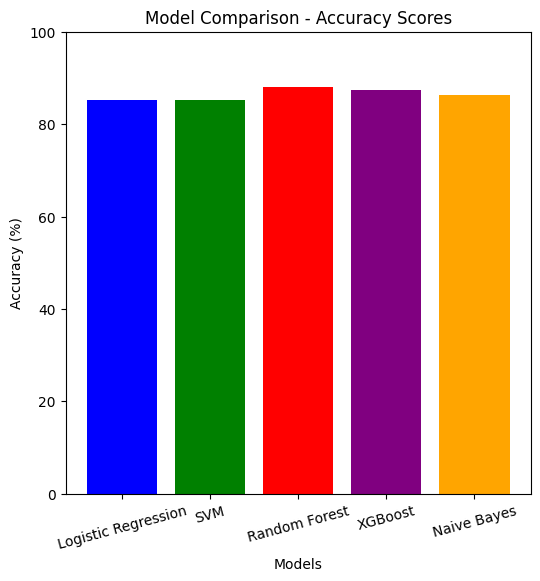

In [19]:
import matplotlib.pyplot as plt
scores = [score_lr, score_svm, score_rf, score_xgb, score_nb]

models = ["Logistic Regression", "SVM", "Random Forest", "XGBoost", "Naive Bayes"]
plt.figure(figsize=(6,6))
plt.bar(models, [score * 100 for score in scores], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Comparison - Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.show()

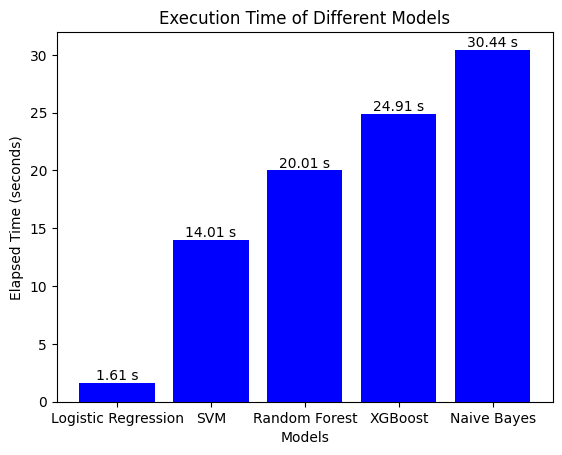

In [64]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'Naive Bayes']

elapsed_times = [1.61,14.01,20.01,24.91,30.44]
plt.bar(models, elapsed_times, color='blue')
plt.xlabel('Models')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Execution Time of Different Models')
for i, v in enumerate(elapsed_times):
    plt.text(i, v, f'{v:.2f} s', ha='center', va='bottom')

plt.show()
